# SPI Bus

    SPI总线是一种4线总线，因其硬件功能很强，所以与SPI有关的软件就相当简单，使中央处理器（Central Processing Unit，CPU）有更多的时间处理其他事务。正是因为这种简单易用的特性，越来越多的芯片集成了这种通信协议。SPI是一种高速、高效率的串行接口技术。通常由一个主模块和一个或多个从模块组成，主模块选择一个从模块进行同步通信，从而完成数据的交换。SPI是一个环形结构，通信时需要至少4根线（事实上在单向传输时3根线也可以）。
    
    SPI的通信原理很简单，它以主从方式工作，这种模式通常有一个主设备和一个或多个从设备，需要至少4根线，事实上3根也可以（单向传输时）。也是所有基于SPI的设备共有的，它们是MISO（主设备数据输入）、MOSI（主设备数据输出）、SCLK（时钟）、CS（片选）。
    （1）MISO/SDI – Master Input Slave Output,主设备数据输入，从设备数据输出；
    （2）MOSI/SDO – Master Output Slave Input，主设备数据输出，从设备数据输入；
    （3）SCLK – Serial Clock，时钟信号，由主设备产生；
    （4）CS – Chip Select，从设备使能信号，由主设备控制。

    CS是从芯片是否被主芯片选中的控制信号，也就是说只有片选信号为预先规定的使能信号时（高电位或低电位），主芯片对此从芯片的操作才有效。这就使在同一条总线上连接多个SPI设备成为可能。
    接下来就负责通讯的3根线了。通讯是通过数据交换完成的，这里先要知道SPI是串行通讯协议，也就是说数据是一位一位的传输的。这就是SCLK时钟线存在的原因，由SCLK提供时钟脉冲，SDI，SDO则基于此脉冲完成数据传输。数据输出通过 SDO线，数据在时钟上升沿或下降沿时改变，在紧接着的下降沿或上升沿被读取。完成一位数据传输，输入也使用同样原理。因此，至少需要8次时钟信号的改变（上沿和下沿为一次），才能完成8位数据的传输。
    
    SCLK信号线只由主设备控制，从设备不能控制信号线。同样，在一个基于SPI的设备中，至少有一个主控设备。这样传输的特点：这样的传输方式有一个优点，与普通的串行通讯不同，普通的串行通讯一次连续传送至少8位数据，而SPI允许数据一位一位的传送，甚至允许暂停，因为SCLK时钟线由主控设备控制，当没有时钟跳变时，从设备不采集或传送数据。也就是说，主设备通过对SCLK时钟线的控制可以完成对通讯的控制。SPI还是一个数据交换协议：因为SPI的数据输入和输出线独立，所以允许同时完成数据的输入和输出。不同的SPI设备的实现方式不尽相同，主要是数据改变和采集的时间不同。

## 优缺点

    1、优点：
        支持全双工，push-pull的驱动性能相比open-drain信号完整性更好；
        支持高速（100MHz以上）；
        协议支持字长不限于8bits，可根据应用特点灵活选择消息字长；
        硬件连接简单；

    2、缺点：
        相比IIC多两根线；
        没有寻址机制，只能靠片选选择不同设备；
        没有从设备接受ACK，主设备对于发送成功与否不得而知；
        典型应用只支持单主控；
        相比RS232 RS485和CAN总线，SPI传输距离短（1m-3m）；

## 传输模式

    通过设置控制寄存器SPICR1中的CPOL和CPHA位，将SPI可以分成四种传输模式。

    CPOL，即Clock Polarity，决定时钟空闲时的电平为高或低。对于SPI数据传输格式没有显著影响。
        1 = 时钟低电平时有效，空闲时为高
        0 = 时钟高电平时有效，空闲时为低

    CPHA，即Clock Phase，定义SPI数据传输的两种基本模式。
        1 = 数据采样发生在时钟（SCK）偶数（2,4,6,...,16）边沿（包括上下边沿）
        0 = 数据采样发生在时钟（SCK）奇数（1,3,5,...,15）边沿（包括上下边沿）

    主从设备进行SPI通讯时，要确保它们的传输模式设置相同。

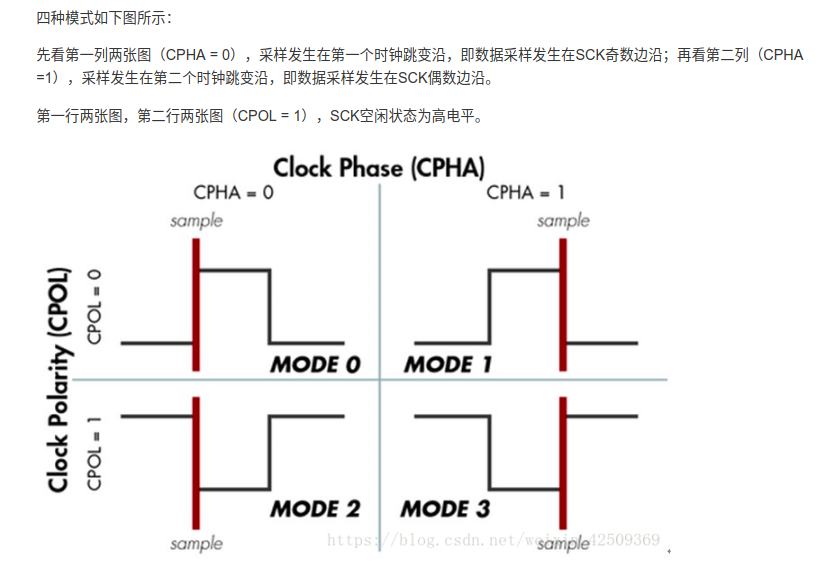

In [2]:
from IPython.display import Image
Image(filename='../images/spi-mode.png', width=800, height=600)

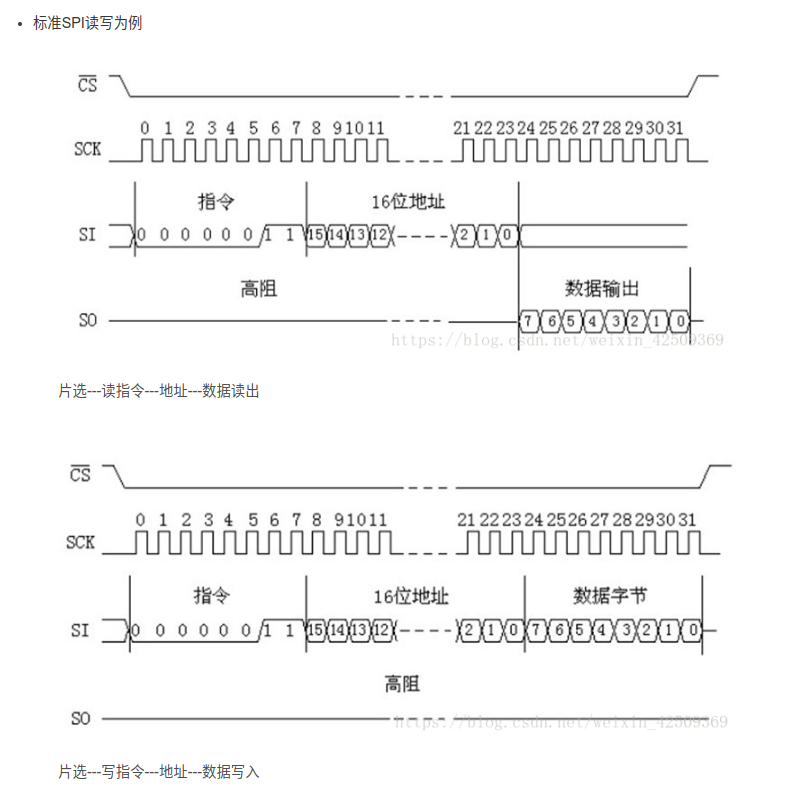

In [5]:
from IPython.display import Image
Image(filename='../images/spi-operation.png', width=650, height=600)